In [1]:
import sys
import numpy as np
sys.path.append("/Users/mlokken/research/lyman_alpha/software/cupix")
from cupix.likelihood.lya_theory import set_theory
from cupix.likelihood.forestflow_emu import FF_emulator
from cupix.likelihood.input_pipeline import Args
%load_ext autoreload
%autoreload 2
from lace.cosmo import camb_cosmo
import matplotlib.pyplot as plt


Load the emulator

In [144]:
# Load emulator
z = np.array([2.2])
omnuh2 = 0.0006
mnu = omnuh2 * 93.14
H0 = 67.36
omch2 = 0.12
ombh2 = 0.02237
As = 2.1e-9
ns = 0.9649
nrun = 0.0
w = -1.0
omk = 0
cosmo = {
    'H0': H0,
    'omch2': omch2,
    'ombh2': ombh2,
    'mnu': mnu,
    'omk': omk,
    'As': As,
    'ns': ns,
    'nrun': nrun,
    'w': w
}
sim_cosmo = camb_cosmo.get_cosmology_from_dictionary(cosmo)
cc = camb_cosmo.get_camb_results(sim_cosmo, zs=z, camb_kmax_Mpc=1000)
ffemu = FF_emulator(z, cosmo, cc)
ffemu.kp_Mpc = 0.7 # pivot point

 /Users/mlokken/research/lyman_alpha/software/ForestFlow/forestflow/P3D_cINN.py:781: UserWarning:Loading a pre-trained emulator


Set the theory

In [145]:
emu_params = Args(data_label='lyacolore')
emu_params.set_baseline()
theory_AA = set_theory(emu_params, ffemu, k_unit='iAA')
theory_AA.set_fid_cosmo(z)

## Set the data

In [146]:
from cupix.likelihood.pipeline import set_Px
Px_data = set_Px(emu_params)

Note: it seems to matter whehter we keep all the k modes or only the positive ones, for the window matrix calculations

theta bin [0.         0.01666667]
theta bin [0.01666667 0.08333333]
theta bin [0.08333333 0.16666667]
theta bin [0.16666667 0.25      ]
theta bin [0.25       0.33333333]
theta bin [0.33333333 0.83333334]


(0.0, 0.8)

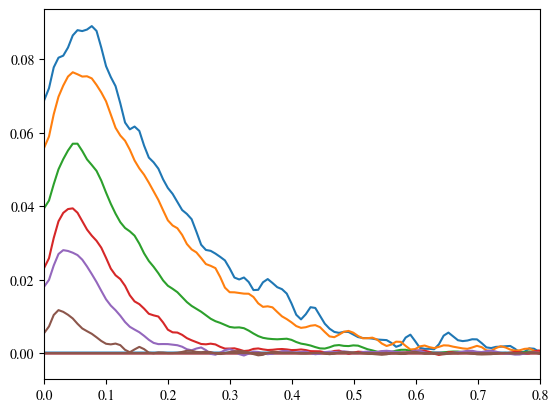

In [147]:
for i in range(len(Px_data.thetabin_deg[0])):
    print(f"theta bin {Px_data.thetabin_deg[0][i]}")
    plt.plot(Px_data.k_AA[0], Px_data.Pk_AA[0,i], label='data')
plt.xlim([0,0.8])

In [148]:
Px_data.window.shape

(1, 6, 1024, 1024)

In [149]:
k_AA_theory = Px_data.k_AA[:,1:200]
out_AA = theory_AA.get_px_AA(
        zs = z,
        k_AA=k_AA_theory,
        theta_bin_deg=Px_data.thetabin_deg,
        window_function=Px_data.window[:,:,1:200,1:200], # need to add this   
        return_blob=False
    )

emu call ffemu {'Delta2_p': array([0.55321519]), 'n_p': array([-2.30303467]), 'mF': array([0.82247582]), 'sigT_Mpc': array([0.13105014]), 'gamma': array([1.54611955]), 'kF_Mpc': array([9.4974917])}
Nz is 1
Input parameters were: {'Delta2_p': 0.5532151927972836, 'n_p': -2.303034666853007, 'mF': 0.8224758188321042, 'sigT_Mpc': 0.1310501400763064, 'gamma': 1.546119545804784, 'kF_Mpc': 9.497491696572993}
Input parameters given to the arinyo model are: {'bias': 0.11099725, 'beta': 1.5426617, 'q1': 0.2765758, 'kvav': 0.5072994, 'av': 0.30710655, 'bv': 1.6391461, 'kp': 12.695492, 'q2': 0.2571776}
Calling...
Px pred shape before return (199, 1, 1000)
px pred shape becomes (1, 1000, 199)
px_Mpc_fine shape (1, 1000, 199)
px_pred_Mpc_avg shape (1, 6, 199)
shape is (1, 6, 199)
shape is (1, 6, 199)


z= 2.2


Text(0.5, 0, '$k~[\\AA^{-1}]$')

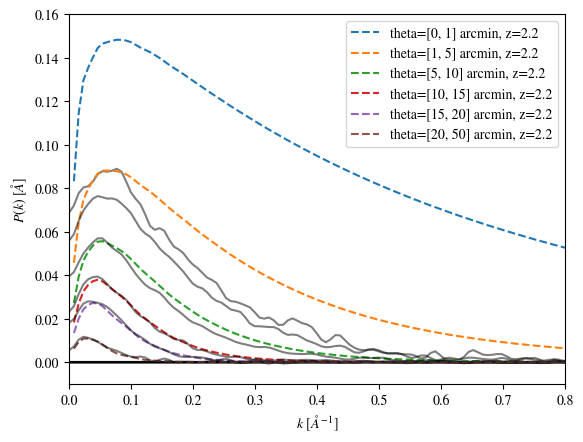

In [160]:
for iz, zbin in enumerate(out_AA):
    print("z=", z[iz])
    if iz==0:
        linestyle='dashed'
    else:
        linestyle='solid'
    
    for itheta, theta in enumerate(zbin):
        # print(out[iz][itheta])
        plt.plot(k_AA_theory[iz], out_AA[iz][itheta], label=f'theta=[{(Px_data.thetabin_deg[iz][itheta]*60)[0]:.0f}, {(Px_data.thetabin_deg[iz][itheta]*60)[1]:.0f}] arcmin, z={z[iz]:.1f}', linestyle=linestyle)
        # plot the data
        plt.plot(Px_data.k_AA[iz], Px_data.Pk_AA[iz, itheta], markersize=3, color='black', alpha=0.5)
plt.legend()
plt.xlim([0,0.8])
plt.ylim([-0.01,.16])
plt.ylabel('$P(k)~[\AA]$')
plt.xlabel(r'$k~[\AA^{-1}]$')